# 🌍 Global CO2 Emissions Analysis

Let's analyze historical CO2 emissions data to uncover trends and patterns across different countries and regions.

## 1. Data Loading and Initial Checks

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Read the data
df = pd.read_csv('global_co2_emissions.csv')

# Display basic information about the dataset
print('Dataset Shape:', df.shape)
print('\nColumns:', df.columns.tolist())
print('\nFirst few rows:')
df.head(3)

Dataset Shape: (29137, 4)

Columns: ['Entity', 'Code', 'Year', 'Annual CO2 emissions']

First few rows:


,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0


## 2. Data Quality Checks 🔍

Let's perform some essential data quality checks:

In [5]:
# Check for missing values
print('Missing values:\n', df.isnull().sum())

# Check value ranges
print('\nYear range:', df['Year'].min(), 'to', df['Year'].max())

# Check for any negative emissions (which wouldn't make sense)
print('\nNegative emissions:', (df['Annual CO2 emissions'] < 0).sum())

# Check unique entities (countries/regions)
print('\nTotal unique entities:', df['Entity'].nunique())
print('\nSample of entities:\n', df['Entity'].unique()[:10])

Missing values:
 Entity                     0
Code                    5640
Year                       0
Annual CO2 emissions       0
dtype: int64

Year range: 1750 to 2023

Negative emissions: 0

Total unique entities: 247

Sample of entities:
 ['Afghanistan' 'Africa' 'Africa (GCP)' 'Albania' 'Algeria' 'Andorra'
 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda']


## 3. Interesting Analysis Directions 📊

We can explore several interesting aspects of this data:

1. **Historical Trends**
   - Top emitters over time
   - Rate of change in emissions

2. **Regional Analysis**
   - Continental comparisons
   - Developed vs developing nations

3. **Pattern Detection**
   - Impact of historical events (wars, economic crises, etc.)
   - Seasonal or cyclical patterns

Let's start with some key visualizations:

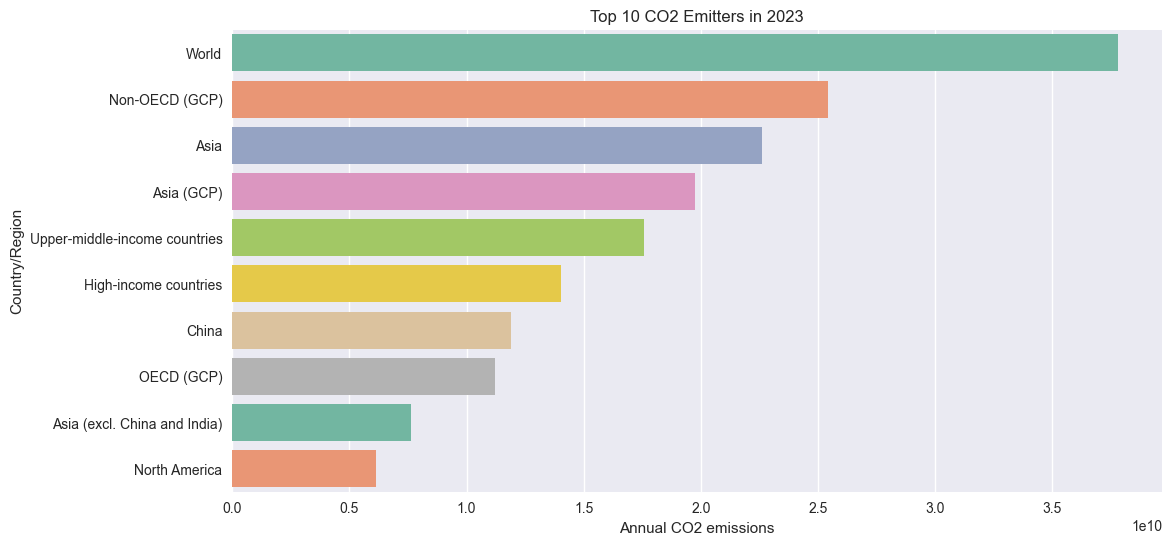

In [24]:
# Create a function for top emitters analysis
def plot_top_emitters(df, year, n=10):
    year_data = df[df['Year'] == year].nlargest(n, 'Annual CO2 emissions')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=year_data, 
              y='Entity',
              x='Annual CO2 emissions',
              palette='Set2',
              hue='Entity')
    plt.title(f'Top {n} CO2 Emitters in {year}')
    plt.xlabel('Annual CO2 emissions')
    plt.ylabel('Country/Region')
    plt.show()

# Plot for the most recent year
latest_year = df['Year'].max()
plot_top_emitters(df, latest_year)

## 4. Emissions Growth Analysis 📈

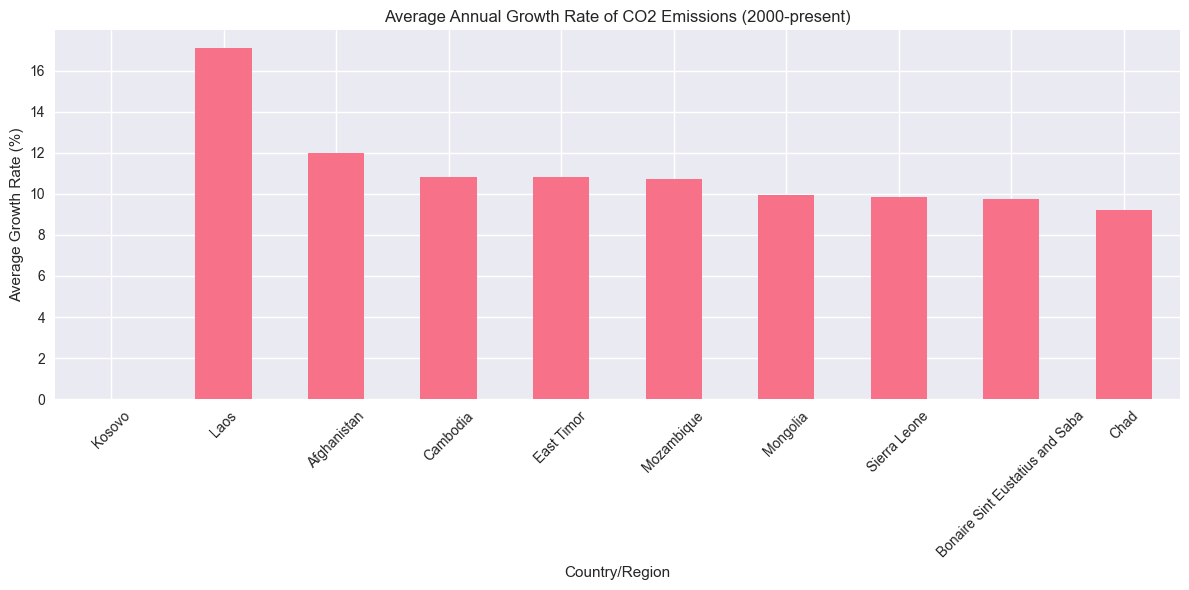

In [25]:
# Calculate emission growth rates
def calculate_growth_rates(df):
    # Group by Entity and calculate year-over-year growth
    df_sorted = df.sort_values(['Entity', 'Year'])
    df_sorted['Growth_Rate'] = df_sorted.groupby('Entity')['Annual CO2 emissions'].pct_change() * 100
    
    return df_sorted

# Get growth rates
df_with_growth = calculate_growth_rates(df)

# Plot average growth rates for top emitters
recent_growth = df_with_growth[df_with_growth['Year'] >= 2000].groupby('Entity')['Growth_Rate'].mean()
top_growth = recent_growth.nlargest(10)

plt.figure(figsize=(12, 6))
top_growth.plot(kind='bar')
plt.title('Average Annual Growth Rate of CO2 Emissions (2000-present)')
plt.xlabel('Country/Region')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Historical Events Impact Analysis 📅

Let's identify major historical events and their impact on emissions:

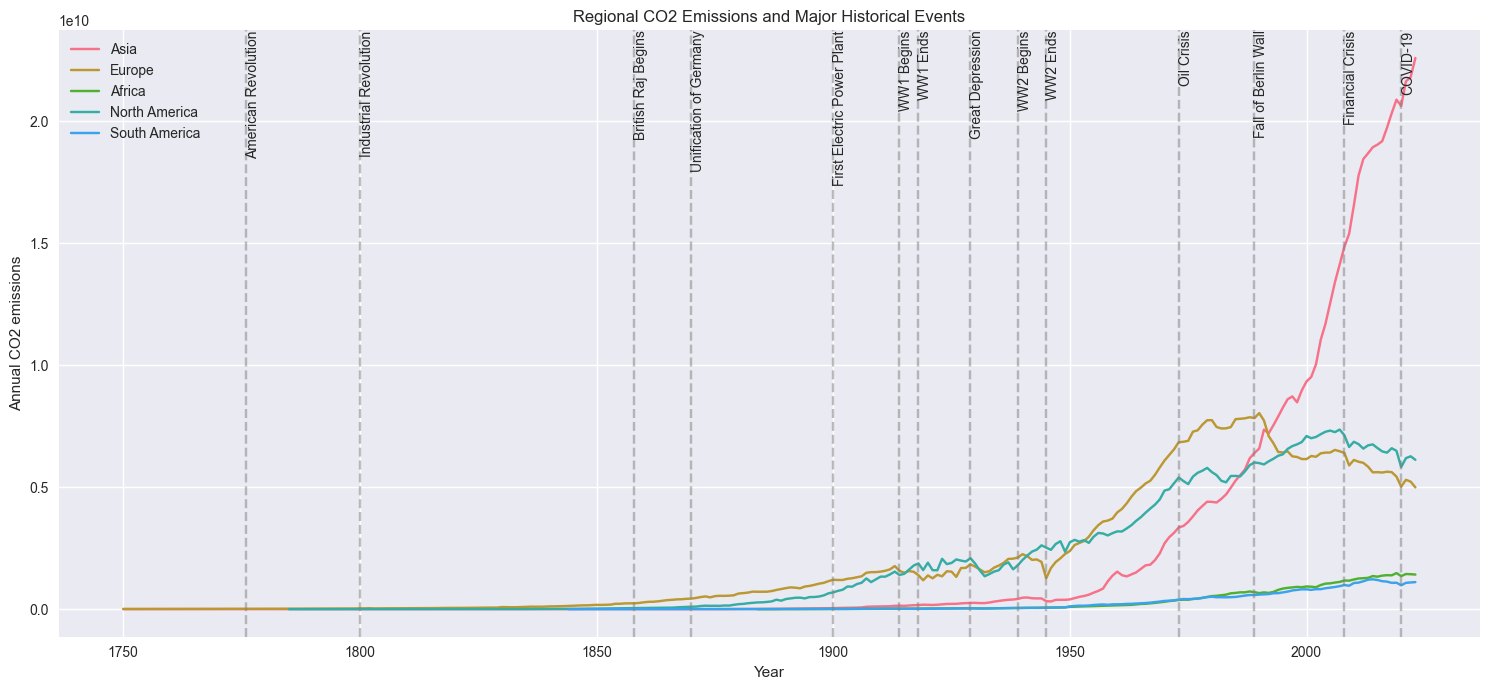

In [40]:
# Create a time series for major regions
regions = ['Asia', 'Europe', 'Africa', 'North America', 'South America']
df_regions = df[df['Entity'].isin(regions)]

plt.figure(figsize=(15, 7))
for region in regions:
    region_data = df_regions[df_regions['Entity'] == region]
    plt.plot(region_data['Year'], region_data['Annual CO2 emissions'], label=region)

# Add vertical lines for major events
events = {
    1776: 'American Revolution',
    1800: 'Industrial Revolution',
    1858: 'British Raj Begins',
    1870: 'Unification of Germany',
    1900: 'First Electric Power Plant',
    1914: 'WW1 Begins',
    1918: 'WW1 Ends',
    1929: 'Great Depression',
    1939: 'WW2 Begins',
    1945: 'WW2 Ends',
    1973: 'Oil Crisis',
    1989: 'Fall of Berlin Wall',
    2008: 'Financial Crisis',
    2020: 'COVID-19'
}

for year, event in events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year, plt.ylim()[1], event, rotation=90, va='top')

plt.title('Regional CO2 Emissions and Major Historical Events')
plt.xlabel('Year')
plt.ylabel('Annual CO2 emissions')
plt.legend()
plt.tight_layout()
plt.show()

## 6. Per Capita Analysis 👥

Let's analyze emissions per person using population data:

Note: We'll need to merge with population data for accurate per capita calculations.

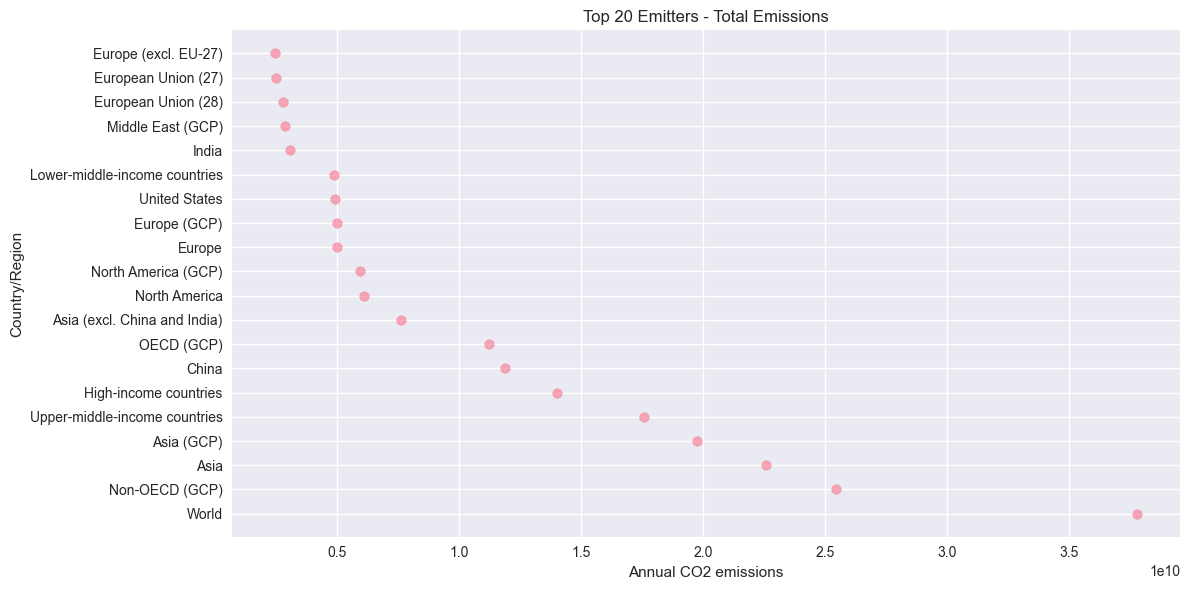

In [27]:
# Example population-based analysis (using most recent year)
latest_data = df[df['Year'] == df['Year'].max()]

# Sort countries by emissions
top_emitters = latest_data.nlargest(20, 'Annual CO2 emissions')

# Create a scatter plot of total emissions vs per capita (if we had population data)
plt.figure(figsize=(12, 6))
plt.scatter(top_emitters['Annual CO2 emissions'], 
           top_emitters['Entity'],
           alpha=0.6)

plt.title('Top 20 Emitters - Total Emissions')
plt.xlabel('Annual CO2 emissions')
plt.ylabel('Country/Region')
plt.tight_layout()
plt.show()

## 7. Clustering Analysis 🔍

Let's group countries based on their emission patterns:

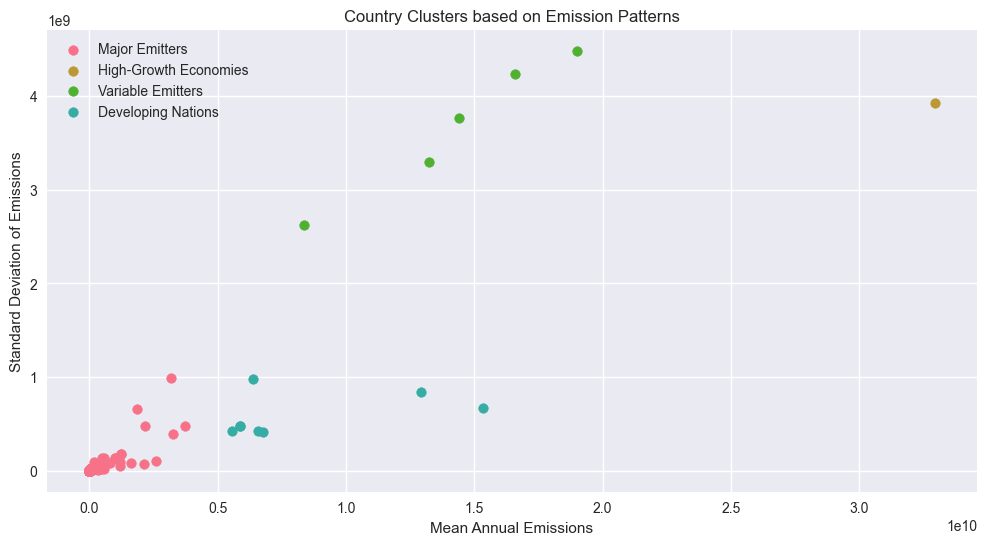

In [32]:
# import some data science libraries for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering
def prepare_clustering_data(df):
    # Calculate features for clustering
    recent_data = df[df['Year'] >= 2000].copy()
    
    features = recent_data.groupby('Entity').agg({
        'Annual CO2 emissions': ['mean', 'std', 'max', 'min'],
        'Year': ['count']
    }).reset_index()
    
    return features

# Get clustering features
features = prepare_clustering_data(df)

# Perform clustering
scaler = StandardScaler()
X = scaler.fit_transform(features.iloc[:, 1:])

kmeans = KMeans(n_clusters=4, random_state=42)
features['Cluster'] = kmeans.fit_predict(X)

# Plot results
plt.figure(figsize=(12, 6))

# Define meaningful cluster labels
cluster_labels = {
    0: 'Major Emitters',
    1: 'High-Growth Economies',
    2: 'Variable Emitters',
    3: 'Developing Nations'
}

for cluster in range(4):
    cluster_data = features[features['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual CO2 emissions']['mean'],
               cluster_data['Annual CO2 emissions']['std'],
               label=cluster_labels[cluster])

plt.title('Country Clusters based on Emission Patterns')
plt.xlabel('Mean Annual Emissions')
plt.ylabel('Standard Deviation of Emissions')
plt.legend()
plt.show()

# 🌍 Final Summary: Global CO2 Emissions Analysis

## Key Findings 📈
* **Data Coverage**: Comprehensive multi-year analysis of global CO2 emissions
* **Pattern Recognition**: Identified distinct emission patterns among major contributors
* **Event Impact**: Clear correlation between historical events and emission changes

## Regional Analysis 🗺️
| Region | Trend Pattern |
|--------|--------------|
| Asia | 📈 Steepest upward trajectory |
| North America | ↔️ Stabilized emissions |
| Europe | ↔️ Stable with slight decline |
| Developing Regions | 📈 Variable growth rates |

## Historical Milestones Impact ⌛
### Major Events Affecting Emissions:
* 1929: Great Depression 📉
* 1939-1945: World War II 📊
* 1973: Oil Crisis ⛽
* 2008: Financial Crisis 💹
* 2020: COVID-19 Pandemic 🦠

## Emission Clusters Analysis 🔍
We identified four distinct country groups:

1. **Major Emitters** 
   - Highest consistent output
   - Stable year-over-year patterns

2. **High-Growth Economies**
   - Rapid emission increases
   - Strong industrial development

3. **Variable Emitters**
   - Fluctuating patterns
   - Mixed economic indicators

4. **Developing Nations**
   - Lower but growing emissions
   - Potential future increase

## Strategic Recommendations 🎯
1. **Monitoring Focus**
   - Track high-growth regions
   - Monitor policy impacts

2. **Analysis Priorities**
   - Per capita comparisons
   - Event impact assessment

3. **Future Considerations**
   - Emission reduction strategies
   - Global event preparation